In [14]:
RED  = '#B13E26'
LRED = '#D38473'
BLUE = '#306693'
LBLUE = '#86B3D9'
GREEN = '#677d00'
LGREEN = '#acd373'
ORANGE = '#E69500'

# import util

import numpy as np
import numpy.linalg as la

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import lines

from matplotlib import rcParams
rcParams['font.family'] = 'Georgia'

%matplotlib inline
import sklearn

import torch
from torch import nn
from torch.optim import SGD, Adam

from tqdm import trange, tqdm

from sklearn.decomposition import PCA
import pandas as pd

def clean(ax=None):
    # turn everything off
    if ax is None:
        ax = plt.gca()
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

def ca(ax=None):
    if ax is None:
        ax = plt.gca()
        
    ax.set_xticks([]) 
    ax.set_yticks([]) 
            
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off', top='off', right='off', left='off',
    labelbottom='off', labelleft='off') # labels along the bottom edge are off

def center(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')
    
def zero(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom='off', labelleft='off')
    
    ax.set_aspect('equal')
    
    
# midnorm = util.MidPointNorm(midpoint=0)

In [3]:
gen = lambda n: 500 + 100 * (10 ** np.abs(np.random.randn(n,) * 0.7))
monthly = gen(100)
yearly = monthly * 3

x = np.concatenate([yearly[:, None], monthly[:, None]], axis=1)


findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


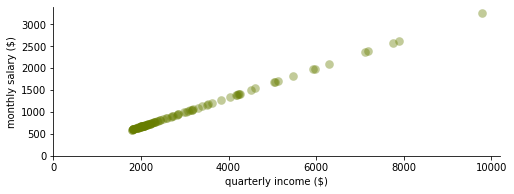

In [4]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 1], color=GREEN, alpha=0.4, s=74, linewidths=0)
ax.set_xlim(left=0); ax.set_ylim(bottom=0)
ax.set_ylabel('monthly salary ($)')
ax.set_xlabel('quarterly income ($)')
clean(ax)
ax.set_aspect('equal') # what does this do -- ensures equal scaling. 

plt.savefig('income1.svg')

In [5]:
xn = x.copy()

# 20 job changers
idx = np.random.randint(100, size=20)
p = 1 - np.random.rand(20) * 0.01
xn[idx, 1] = xn[idx, 1] * p + gen(20) * 3 * (1 - p)

# 25 bonus receivers
idx = np.random.randint(100, size=25)
xn[idx, 1] *= np.random.rand(25) * 0.5 + 1 

# 30 people with extra income
idx = np.random.randint(100, size=30)
xn[idx, 1] += gen(30) * 0.5

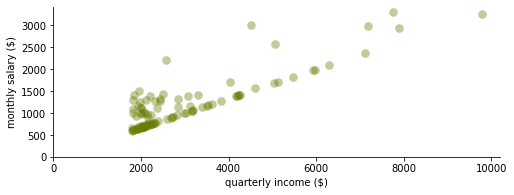

In [6]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.scatter(xn[:, 0], xn[:, 1], color=GREEN, alpha=0.4, s=74, linewidths=0)
ax.set_xlim(left=0); ax.set_ylim(bottom=0)
ax.set_ylabel('monthly salary ($)')
ax.set_xlabel('quarterly income ($)')
clean(ax)
ax.set_aspect('equal')


plt.savefig('income2.svg')

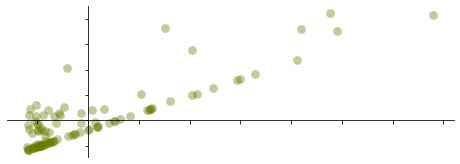

In [7]:
xm = xn - xn.mean(axis=0, keepdims=True)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(xm[:, 0], xm[:, 1], color=GREEN, alpha=0.4, s=76, linewidths = 0)
ax.set_aspect('equal')
zero(ax)
ax.tick_params(labelbottom=False, labelleft=False) 

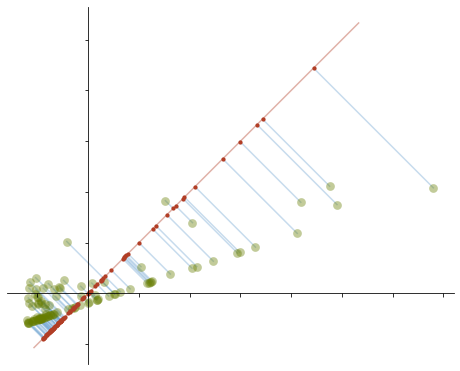

In [8]:
# w = np.random.randn((2, 1)) # random

# Instead of a random w, we pick the diagonal
w = np.ones((2, 1)) # diagonal line
w /= la.norm(w)

# project to z 
z = np.matmul(xm, w)
# project back 
xp = z * w.T

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.scatter(xm[:, 0], xm[:, 1], color=GREEN, alpha=0.4, s=76, linewidths=0)
ax.set_aspect('equal')
zero(ax)
ax.tick_params(labelbottom=False, labelleft=False)  

ax.scatter(xp[:, 0], xp[:, 1], color=RED, alpha=1, s=18, linewidths=0)

mm = np.asarray([[z.min()], [z.max()]]) * 1.2
ls = mm * w.T
ax.plot(ls[:, 0], ls[:, 1], color=RED, alpha =0.4)

for i in range(xp.shape[0]):
    line = lines.Line2D([xm[i, 0], xp[i, 0]], [xm[i, 1], xp[i, 1]], color='#73a7d3', zorder=-1, alpha=0.4)
    ax.add_line(line)

# ax.set_xlim(x.min(), x.max()); ax.set_ylim(x.min(), x.max())

plt.savefig('random-w.pdf', transparent=False, bbox_inches='tight', pad_inches=0)

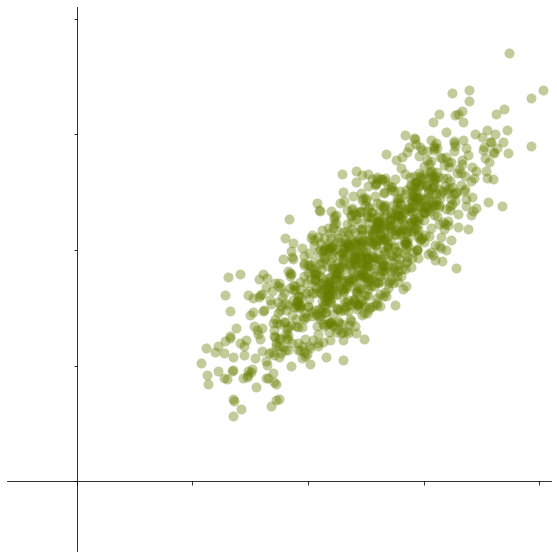

In [28]:
cov =  np.asarray([[1, .8], [0.8, 1]])
mean = np.asarray([5, 4])
x = np.random.multivariate_normal(mean, cov, size=1000)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], x[:, 1], color=GREEN, alpha=0.4, s=100, linewidths=0)

zero(ax)
ax.tick_params(labelbottom=False, labelleft=False)

ax.set_xlim(-1.2, 8.2)
ax.set_ylim(-1.2, 8.2)

plt.savefig('covariance.svg', transparent=False, bbox_inches='tight', pad_inches=0)

In [37]:
mean

array([5, 4])

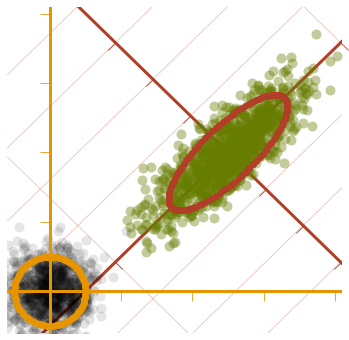

In [62]:
import matplotlib.ticker as ticker
import mpl_toolkits.axisartist as AA
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator,
                                                 DictFormatter)
from matplotlib.transforms import Affine2D


def axstyle(ax, c='k'):
    """
    Utility function for styling axes
    """
    ax.line.set_color(c)
    ax.major_ticks.set_color(c)
    ax.major_ticks.set_ticksize(10)
    ax.major_ticks.set_linewidth(8)
    ax.major_ticklabels.set_visible(False)
    ax.line.set_linewidth(3)

# Perform the eigendecomp on the covariance matrix
w, v = np.linalg.eig(cov)

# inverse of the A matrix from the blog post.
ai = v.T.dot( np.diag(w ** -.5) )

# Turn into a 3x3 matrix to put transformation and translation in one matrix.
mat = np.concatenate([ai, mean[:, None]], axis=1)
mat = np.concatenate([mat, np.asarray([[0, 0, 1]])], axis=0)
tr = Affine2D(matrix=mat)

fig = plt.figure(figsize=(6, 6))

ticks = np.arange(-100, 100, 2)

# We use a curvilinear projection to plot the eigenbasis axes
grid_helper = AA.GridHelperCurveLinear(tr, 
    grid_locator1=FixedLocator(ticks),
    grid_locator2=FixedLocator(ticks))

# We plot both bases by overlaying two subplots: one with the curvilinear 
# transform, one standard.
ax = AA.Subplot(fig, 111, grid_helper=grid_helper, zorder=-1)

ax2 = AA.Subplot(fig, 111, zorder=1)
ax2.patch.set_alpha(0.0)

fig.add_subplot(ax)
fig.add_subplot(ax2)

# Remove all standard axes
ax.axis['top', 'right', 'bottom', 'left'].set_visible(False)
ax2.axis['top', 'right', 'bottom', 'left'].set_visible(False)

# add zero-centered axes for the standard basis
ax2.axis['midx'] = ax2.new_floating_axis(nth_coord=0, value=0)
ax2.axis['midy'] = ax2.new_floating_axis(nth_coord=1, value=0)

# add transformed axes for the eigenbasis
ax.axis['eigenx'] = ax.new_floating_axis(0, 0) # (1, 0) --> (5, 0)
ax.axis['eigeny'] = ax.new_floating_axis(1, 0) # (0, 1) --> (0, 4) ?

ax2.axis['midx'].invert_ticklabel_direction()
ax.axis['eigeny'].invert_ticklabel_direction()
ax.axis['eigenx'].invert_ticklabel_direction()

axstyle(ax.axis['eigenx'], c=RED)
axstyle(ax.axis['eigeny'], c=RED)
axstyle(ax2.axis['midx'], c=ORANGE)
axstyle(ax2.axis['midy'], c=ORANGE)

ax2.scatter(x[:, 0], x[:, 1], color=GREEN, alpha=0.4, s=100, linewidths=0)

ax2.scatter(z[:, 0], z[:, 1], color='k', alpha=0.1, s=100, linewidths=0)

# plot the bi-unit circle
ang = np.linspace(0, np.pi*2, 100)[:, None]
xy = np.concatenate([np.sin(ang), np.cos(ang)], axis=1)
# ... and the transformed ellipse
el = tr.transform(xy)

ax2.scatter(xy[:, 0], xy[:, 1], color = ORANGE, alpha = 1.0)
ax2.scatter(el[:, 0], el[:, 1], color = RED, alpha = 1.0)


# ax.set_aspect(1)
ax2.set_xlim(-1.2, 8.2)
ax2.set_ylim(-1.2, 8.2)
ax.set_xlim(-1.2, 8.2)
ax.set_ylim(-1.2, 8.2)

ax.grid(True, zorder=0, color=LRED, alpha=0.5)

z = tr.inverted().transform(x)



# plt.savefig('covariance-2.svg', transparent=False, bbox_inches='tight', pad_inches=0)


plt.savefig('covariance-2.svg', transparent=False, bbox_inches='tight', pad_inches=0)

In [35]:
|ticks


array([-100,  -98,  -96,  -94,  -92,  -90,  -88,  -86,  -84,  -82,  -80,
        -78,  -76,  -74,  -72,  -70,  -68,  -66,  -64,  -62,  -60,  -58,
        -56,  -54,  -52,  -50,  -48,  -46,  -44,  -42,  -40,  -38,  -36,
        -34,  -32,  -30,  -28,  -26,  -24,  -22,  -20,  -18,  -16,  -14,
        -12,  -10,   -8,   -6,   -4,   -2,    0,    2,    4,    6,    8,
         10,   12,   14,   16,   18,   20,   22,   24,   26,   28,   30,
         32,   34,   36,   38,   40,   42,   44,   46,   48,   50,   52,
         54,   56,   58,   60,   62,   64,   66,   68,   70,   72,   74,
         76,   78,   80,   82,   84,   86,   88,   90,   92,   94,   96,
         98])